In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras

In [2]:
titanic = pd.read_csv('titanic.csv')

titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

<Figure size 432x288 with 0 Axes>

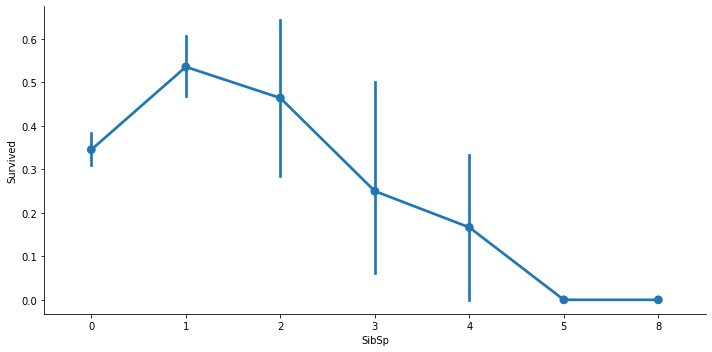

<Figure size 432x288 with 0 Axes>

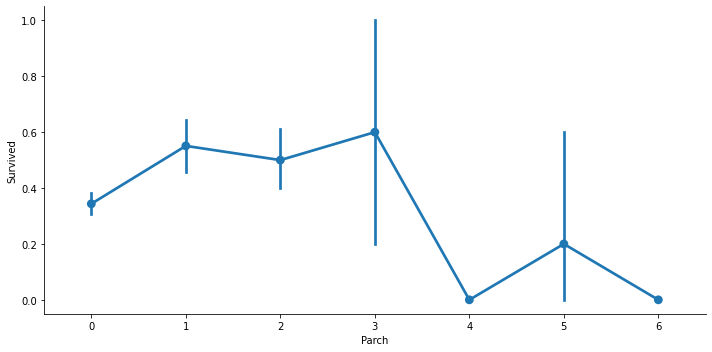

In [14]:
for i, col in enumerate(['SibSp', 'Parch']):
  plt.figure()
  sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2)

In [15]:
titanic['Family_cnt'] = titanic['SibSp'] + titanic['Parch']

In [16]:
titanic.drop(['PassengerId', 'SibSp', 'Parch'], axis=1, inplace=True)

In [18]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family_cnt
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0


In [ ]:
titanic.to_csv('titanic_cleaned.csv', index=False)

In [19]:
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1)

In [21]:
gender_num = { 'male': 0, 'female': 1 }

titanic['Sex'] = titanic['Sex'].map(gender_num)

In [22]:
titanic.drop(['Cabin', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)



In [23]:
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


In [24]:
titanic.to_csv('titanic_cleaned.csv', index=False)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
features = titanic.drop('Survived', axis=1)
print(features)

     Pclass  Sex        Age     Fare  Family_cnt  Cabin_ind
0         3    0  22.000000   7.2500           1          0
1         1    1  38.000000  71.2833           1          1
2         3    1  26.000000   7.9250           0          0
3         1    1  35.000000  53.1000           1          1
4         3    0  35.000000   8.0500           0          0
..      ...  ...        ...      ...         ...        ...
886       2    0  27.000000  13.0000           0          0
887       1    1  19.000000  30.0000           0          1
888       3    1  29.699118  23.4500           3          0
889       1    0  26.000000  30.0000           0          1
890       3    0  32.000000   7.7500           0          0

[891 rows x 6 columns]


In [27]:
labels = titanic['Survived']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = 0.4, random_state=42)


In [34]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [35]:
X_train.to_csv('train_features.csv')
X_val.to_csv('val_features.csv')
X_test.to_csv('test_features.csv')

y_train.to_csv('train_labels.csv')
y_val.to_csv('val_labels.csv')
y_test.to_csv('test_labels.csv')

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [37]:
rf = RandomForestClassifier()

scores = cross_val_score(rf, X_train, y_train, cv=5)



In [38]:
scores

array([0.8317757 , 0.8317757 , 0.79439252, 0.79439252, 0.80188679])

In [39]:
from sklearn.model_selection import GridSearchCV

In [42]:
def print_results(results):
  print(f'Best params: {results.best_params_}')

  means = results.cv_results_['mean_test_score']
  stds = results.cv_results_['std_test_score']
  params = results.cv_results_['params']

  for mean, std, params in zip(means, stds, params):
    print(f'{round(mean, 3)} (+/-{round(std * 2, 3)} for {params})')

In [43]:
rf = RandomForestClassifier()

parameters = {
    'n_estimators': [5, 50, 100],
    'max_depth': [2, 10, 20, None]
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(X_train, y_train)

print_results(cv)

Best params: {'max_depth': 10, 'n_estimators': 5}
0.764 (+/-0.139 for {'max_depth': 2, 'n_estimators': 5})
0.79 (+/-0.098 for {'max_depth': 2, 'n_estimators': 50})
0.802 (+/-0.124 for {'max_depth': 2, 'n_estimators': 100})
0.833 (+/-0.072 for {'max_depth': 10, 'n_estimators': 5})
0.818 (+/-0.041 for {'max_depth': 10, 'n_estimators': 50})
0.828 (+/-0.056 for {'max_depth': 10, 'n_estimators': 100})
0.798 (+/-0.058 for {'max_depth': 20, 'n_estimators': 5})
0.807 (+/-0.028 for {'max_depth': 20, 'n_estimators': 50})
0.803 (+/-0.026 for {'max_depth': 20, 'n_estimators': 100})
0.807 (+/-0.029 for {'max_depth': None, 'n_estimators': 5})
0.817 (+/-0.043 for {'max_depth': None, 'n_estimators': 50})
0.815 (+/-0.029 for {'max_depth': None, 'n_estimators': 100})


In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [45]:
rf1 = RandomForestClassifier(n_estimators=5, max_depth=10)
rf1.fit(X_train, y_train)

rf2 = RandomForestClassifier(n_estimators=5, max_depth=50)
rf2.fit(X_train, y_train)

rf3 = RandomForestClassifier(n_estimators=5, max_depth=100)
rf3.fit(X_train, y_train)


RandomForestClassifier(max_depth=100, n_estimators=5)

In [48]:
for mdl in [rf1, rf2, rf3]:
  y_pred = mdl.predict(X_val)
  accuracy = round(accuracy_score(y_val, y_pred), 3)
  precision = round(precision_score(y_val, y_pred), 3)
  recall = round(recall_score(y_val, y_pred), 3)

  print(f'MAX DEPTH: {mdl.max_depth} / # OF EST: {mdl.n_estimators} -- A: {accuracy} / P: {precision} / R: {recall}')

MAX DEPTH: 10 / # OF EST: 5 -- A: 0.799 / P: 0.786 / R: 0.724
MAX DEPTH: 50 / # OF EST: 5 -- A: 0.827 / P: 0.817 / R: 0.763
MAX DEPTH: 100 / # OF EST: 5 -- A: 0.816 / P: 0.795 / R: 0.763


In [49]:
y_pred = rf2.predict(X_test)
accuracy = round(accuracy_score(y_test, y_pred), 3)
precision = round(precision_score(y_test, y_pred), 3)
recall = round(recall_score(y_test, y_pred), 3)

print(f'MAX DEPTH: {rf2.max_depth} / # OF EST: {rf2.n_estimators} -- A: {accuracy} / P: {precision} / R: {recall}')

MAX DEPTH: 50 / # OF EST: 5 -- A: 0.764 / P: 0.709 / R: 0.6
